# 01 `matplotlib`. Изображения и оси координат

## Введение

Библиотека `matplotlib` является одной из наиболее развитых библиотек для визуализации данных не только в рамках языка Python, но и среди всех языков программирования вообще. Сопоставимым уровнем функционалом обладают средства для рисования встроенные в коммерческие программы (MatLab, Mathematica, Maple), библиотека `ggplot` языка `R`, утилита `gnuplot`. Однако `matplotlib` отличается рядом существенных преимуществ, таких как независимость от платформы, интеграция с библиотекой `NumPy`, поддержка формул $\LaTeX$. Существенной слабой стороной `matplotlib` является плохая поддержка трехмерных построений. В остальном данная библиотека является одним из лучших бесплатных решений для визуализации данных.

Для использования библиотеки `matplotlib` совместно с оболочкой `IPython` или `Jupyter`, необходимо выполнить команду `%matplotlib inline`, а затем импортировать модуль `matplotlib.pyplot` дав ему краткое имя `plt`. Именно данный модуль обеспечивает доступ к основным объектам и функциям библиотеки. Также почти во всех примерах будут использоваться функции из библиотеки `NumPy`, так что следует импортировать и эту библиотеку тоже.

In [1]:
#! /usr/bin/env python3
# -*- coding: utf-8 -*-
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Начиная с версии 1.5 в `Matplotlib` появилась возможность использовать отдельные файлы с настройками стилей изображений. Эти файлы должны иметь расширение `.mplstyle` и содержать параметры, аналогичные параметрам из общего файла настроек `.matplotlibrc`. С помощью функции `plt.style.use` можно загрузить и активировать нужный файл стилей.

In [2]:
plt.style.use('black_white.mplstyle')

## Создание изображения и системы координат

Изначально `matplotlib` разрабатывался с оглядкой на `MatLab`, поэтому в библиотеку встроен интерфейс, во многом повторяющий `MatLab`. Мы, однако, будем пользоваться объектно-ориентированным интерфейсом `matplotlib`, так как он обеспечивает большую гибкость и контроль над настройками графиков.

Построение любого графика начинается с создания изображения (объект класса `figure`) и добавления на это изображение одной или нескольких систем координат (объекты класса `axes`). Для создания изображения используется метод `plt.figure()`, который возвращает объект, представляющий из себя пустое изображение без осей, графиков и надписей. В дальнейшем можно добавлять на этот рисунок необходимые элементы. Метод `figure` может принимать ряд аргументов, полный список который можно посмотреть в справочной строке данного метода (в Jupyter Notebook нажать клавишу таб после имени метода).

Следующим шагом необходимо добавить в объект `figure` оси координат. Стандартный метод `add_subplot()` позволяет задать прямоугольную сетку из субкоординат (субграфиков). Рассмотрим пример.

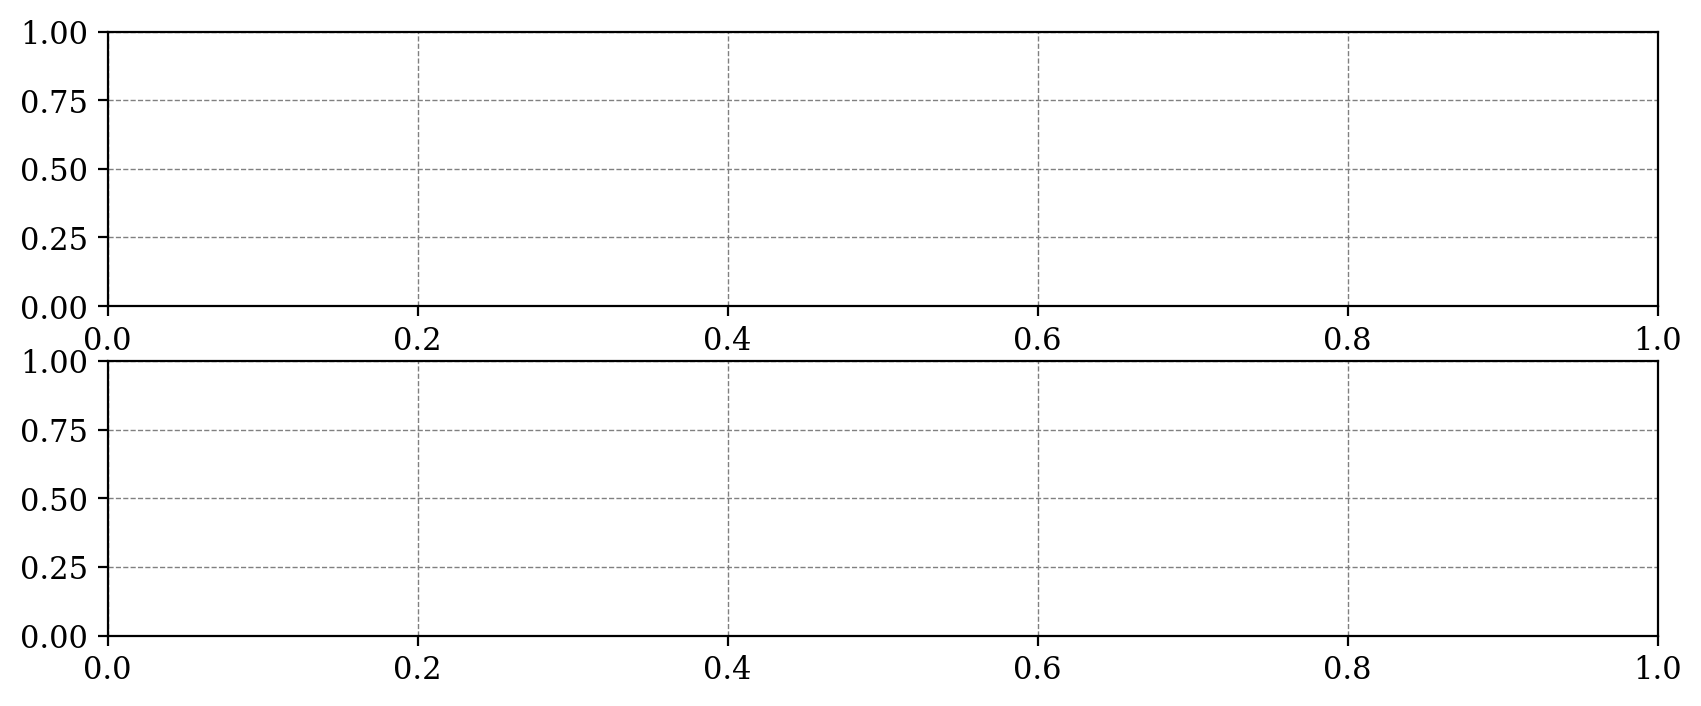

In [7]:
fig01 = plt.figure(num=0)
ax01 = fig01.add_subplot(2, 1, 1)
ax02 = fig01.add_subplot(2, 1, 2)
fig01.savefig('img01a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

В данном примере изображение разбивается на две части по горизонтали. Первый аргумент `add_subplot()` — число строк, второй число столбцов и третий номер субграфика. С каждым субграфиком можно взаимодействовать отдельно (переменные `ax01` и `ax02`), строя на нем кривые, меняя тип координатных линий, добавляя аннотации, легенды и подписи к осям.

Добавим к созданным системам координат графики синуса и косинуса, для чего сперва рассчитаем соответствующие значения.

In [8]:
t = np.linspace(-4*np.pi, 4*np.pi, 400)
x = np.sin(t)
y = np.cos(t)

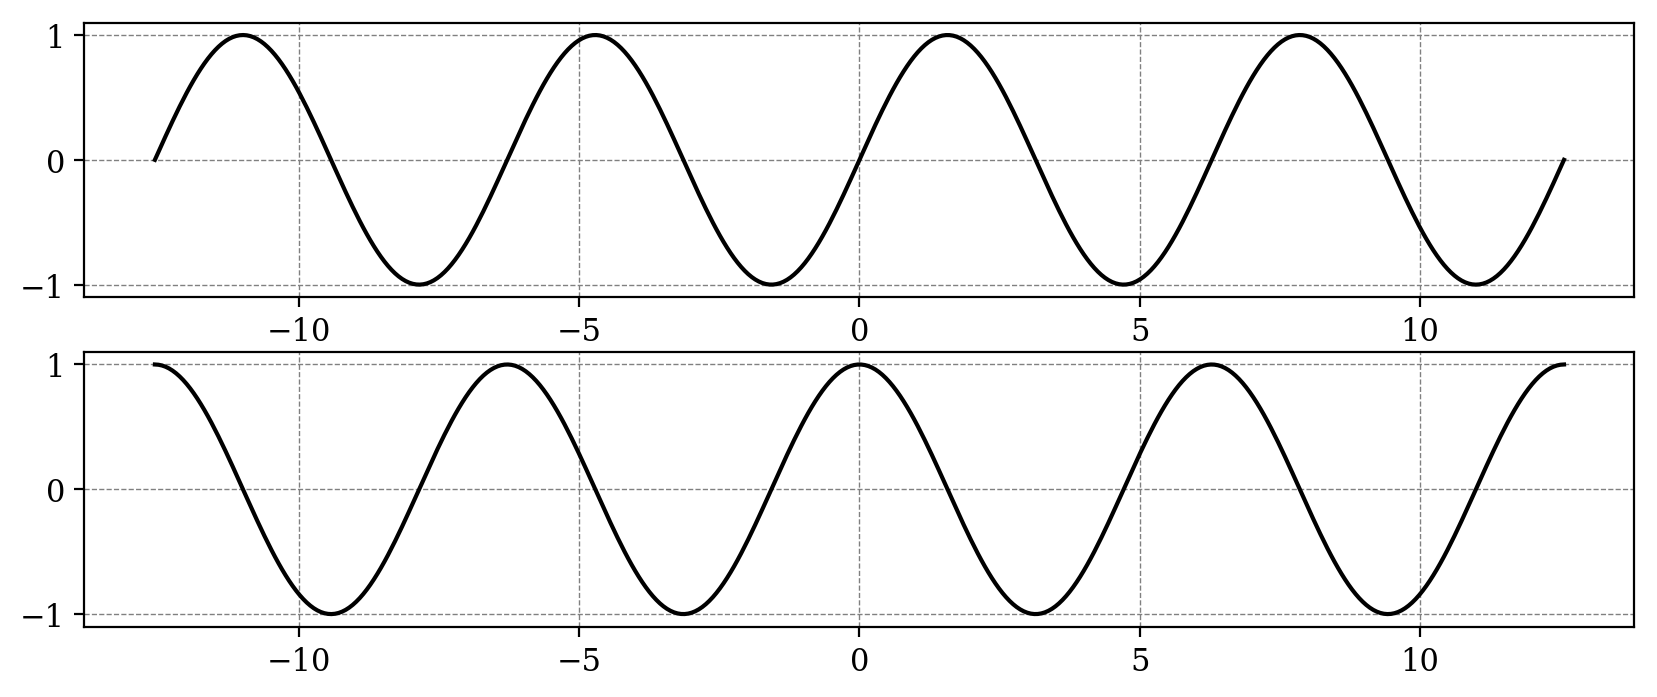

In [9]:
fig01 = plt.figure(num=0)

ax01 = fig01.add_subplot(2, 1, 1)
ax02 = fig01.add_subplot(2, 1, 2)

ax01.plot(t, x)
ax02.plot(t, y)

fig01.savefig('img01b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

Если необходимо создать большое число субграфиков в сетке, то удобно сделать это в цикле или в списковой сборке, как это показано в примере ниже

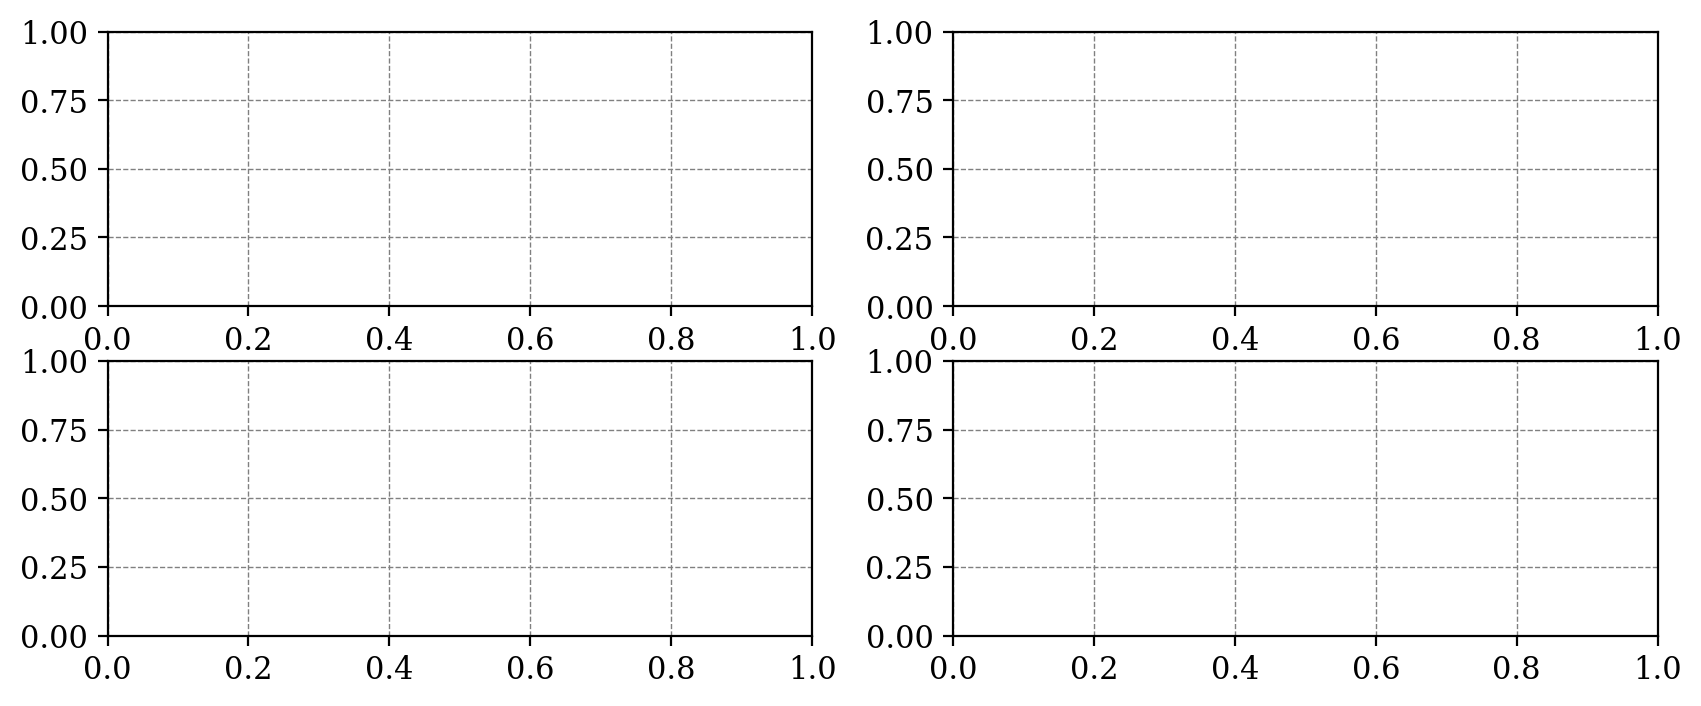

In [10]:
fig02 = plt.figure(num=1)
ax = [fig02.add_subplot(2, 2, i) for i in range(1,5)]

# аналогичный способ с циклом
# ax = []
# for i in range(1,5):
#     ax.append(fig02.add_subplot(2, 2, i))
fig02.savefig('img02.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

В примере ниже на каждом субграфике строится функция
$y = \sin(ix) + \cos(ix),$
где $i$ — номер субграфика (начиная с 0).

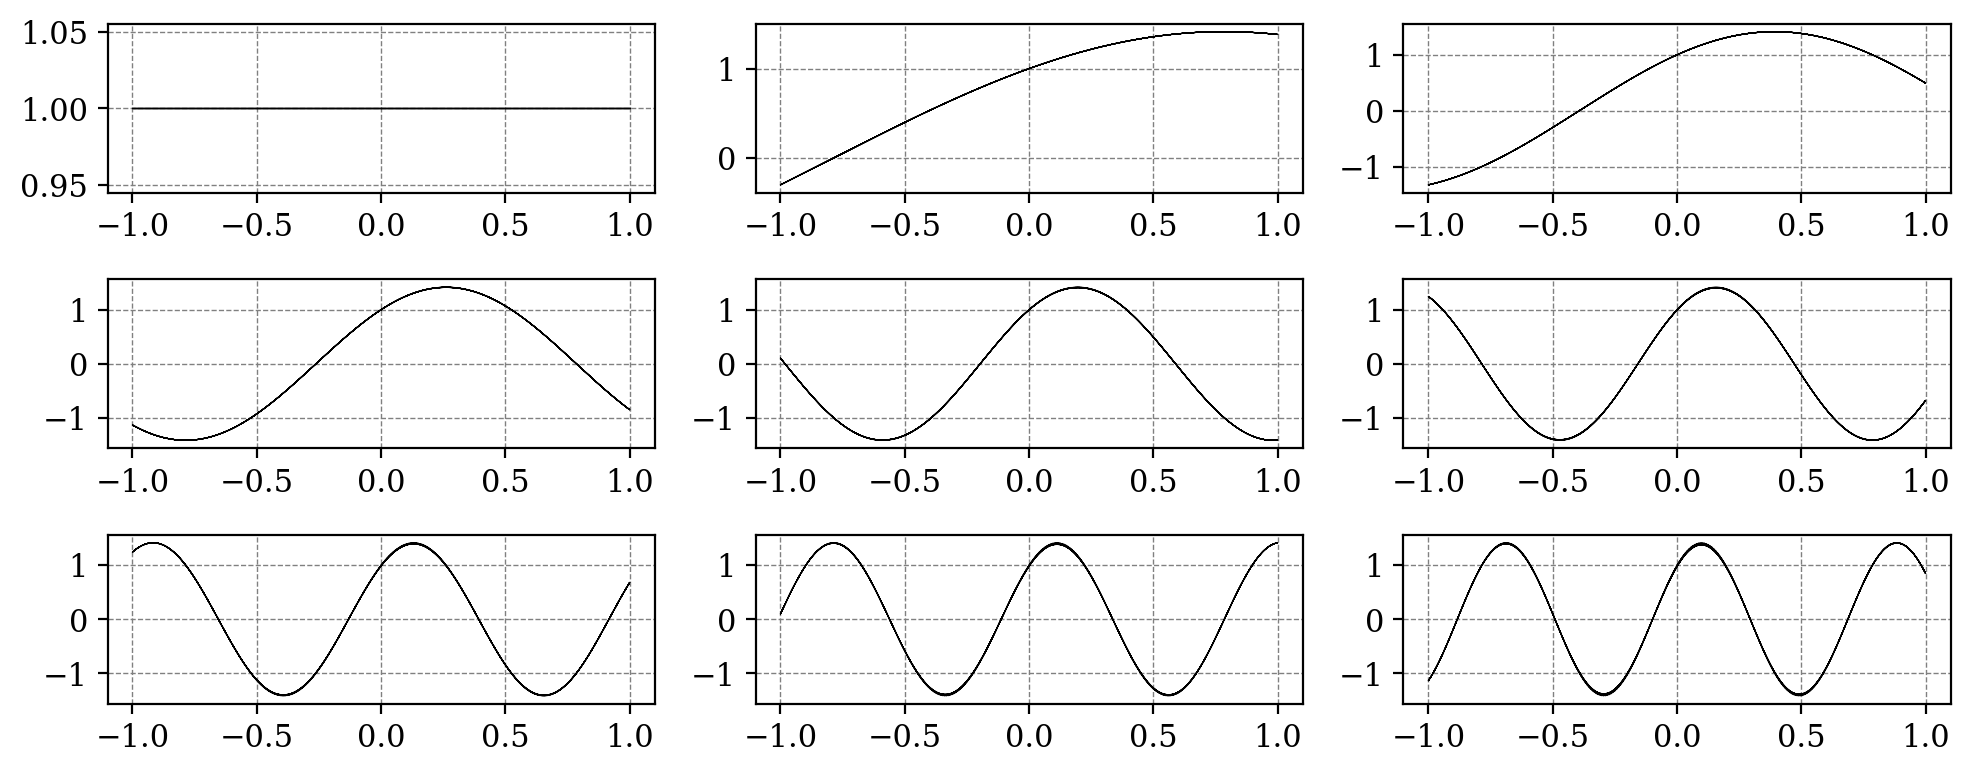

In [11]:
fig03 = plt.figure(num=2)
axs = [fig03.add_subplot(3, 3, i) for i in range(1,10)]

for (i, ax) in enumerate(axs):
    y = np.sin(i*x) + np.cos(i*x)
    ax.plot(x, y, linewidth=0.4)

fig03.tight_layout()

fig03.savefig('img03.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

## Метод `plot`

Метод `plot()` служит основным средством для создания одномерных графиков из массива координатных точек. Кроме непосредственно набора координат он может принимать множество параметров для тонкой настройки вида графика. Перечислим наиболее часто используемые из них.
* `color` — цвет; можно задавать любой цвет, если строить несколько графиков, то они автоматически красятся разным цветом.
* `linewidth` — толщина линии, по умолчанию равна 1.
* `linestyle` — тип линии кривой; среди поддерживаемых типов сплошная линия ('solid' или '-'), пунктирная ('dashed' или '--'), точечная ('doted' или ':') и пунктирно-точечная ('dashdot' или '-.').
* `label` — легенда графика (то есть краткое пояснение к графику, обычно отображающееся в углу изображения). Следует отметить, что для отображения легенды следует вызвать метод `legend()` объекта `axes` иначе легенда не отобразится.
Рассмотрим пример использования функции `plot` для отображения двух графиков в одной системе координат в черно-белом формате.

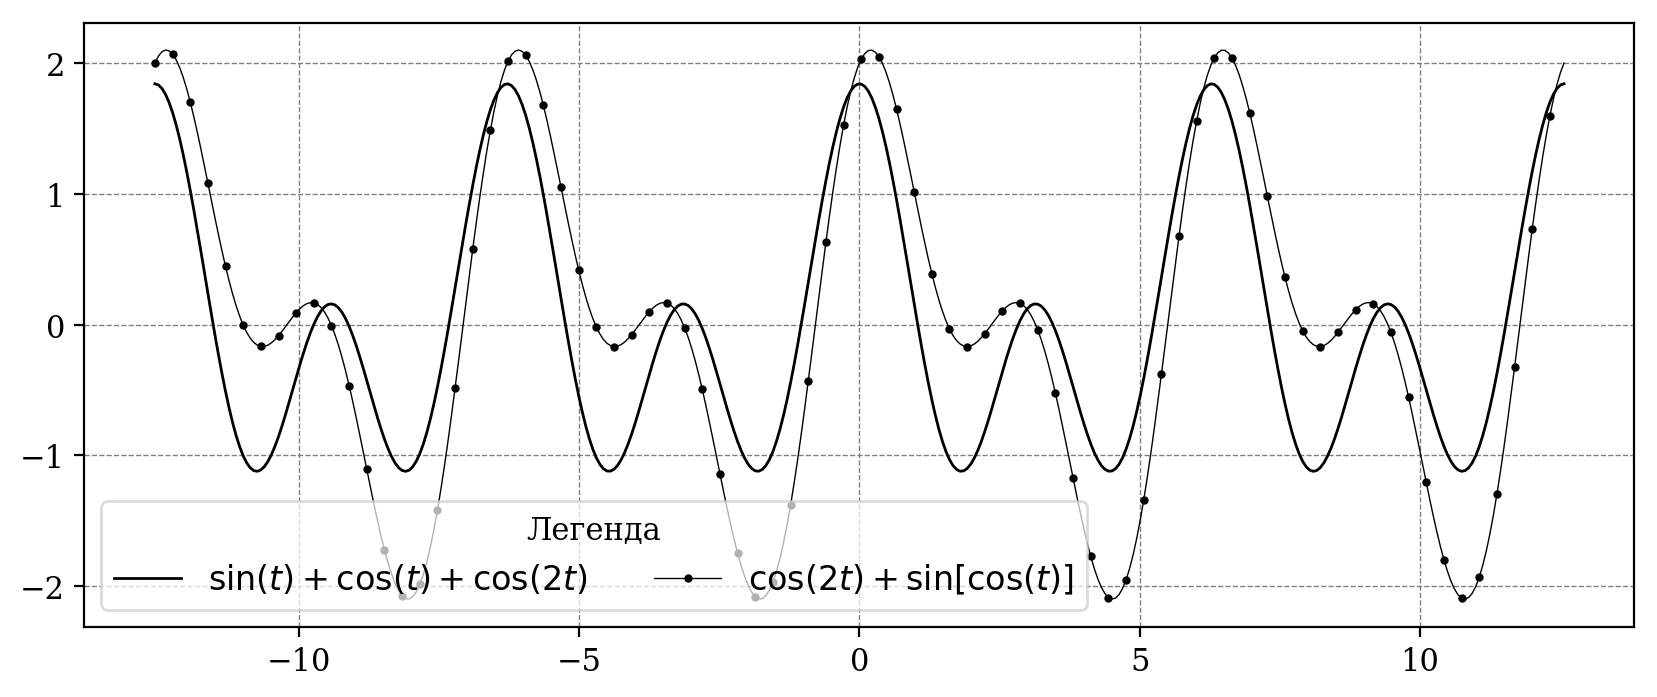

In [12]:
t = np.linspace(-4*np.pi, 4*np.pi, 400)
x = np.sin(t) + np.cos(t) + np.cos(2*t)
y = np.cos(2*t) + np.sin(np.cos(t))

fig04 = plt.figure(10)
ax04 = fig04.add_subplot(1, 1, 1)
label_01 = r'$\sin({t}) + \cos({t}) + \cos({2t})$'
label_02 = r'$\cos{(2t)} + \sin{[\cos{(t)}]}$'
ax04.plot(t, y, linewidth=1.0, linestyle='-', marker='None', label=label_01)
ax04.plot(t, x, linewidth=0.5, linestyle='-', marker='.', markevery=5, markersize=4,  label=label_02)

ax04.legend(ncol=2, title='Легенда', framealpha=0.7, fontsize=12)

fig04.savefig('img04a.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

В данном примере кроме вышеперечисленных опций функции `plot` были использованы опции для настройки маркеров --- значков, которыми можно выделить точки графиков. Особенно это полезно на черно-белых изображениях, так как дает возможность различить графики нарисованные одним и тем же цветом. Параметр `marker` устанавливает значек маркера (полный список смотрите в документации к `plot`), параметр `markevery` позволяет регулировать количество маркеров, отображаемых на кривой, `markersize` позволяет установить размер маркера.

В методе `legend` мы использовали параметр `ncol`, который устанавливает количество колонок в легенде, параметр `title` устанавливает заголовок для легенды (по умолчанию заголовок не отображается), параметр `framealpha` регулирует прозрачность рамки легенды, `fontsize` устанавливает размер шрифта. Последним параметром не стоит злоупотреблять, так как гораздо удобнее установить один размер шрифта для всех элементов графика (как это сделать мы рассмотрим далее).

## Настройка осей координат

Продолжим настраивать наш график из прошлого примера. Добавим подписи к осям $Ox$ и $Oy$ с помощью методов `set_xlabel` и `set_ylabel`, заголовок к изображению с помощью метода `set_title`, а также настроим точные границы осей координат с помощью метода `set_xlim`.

In [13]:
ax04.set_title('Это заголовок нашей картинки')
ax04.set_xlabel(r'Ось $x$')
ax04.set_ylabel(r'Ось $y$')

ax04.set_xlim(left=t[0], right=t[-1])

(-12.566370614359172, 12.566370614359172)

Проведем теперь более сложные настройки и заменим отсечки координат по оси `Ox` не просто вещественными числами, а числами кратными $\pi$. Для этого сперва создадим два списка. В `xticks` запишем точки $-4\pi$, $-3\pi$, $-2\pi$, $-\pi$, $0$, $\pi$, $2\pi$, $3\pi$, $4\pi$, а в список `xtickslabels` запишем значения строкового типа, которые предполагается отображать в качестве обозначения отсечек. Можно использовать команды $\LaTeX$ для отображения буквы $\pi$ или юникодный символ π. После того, как списки созданы, их надо передать методам `set_xticks` и `set_xticklabels` которые заменят атвтоматически созданные отсечки на созданные нами.

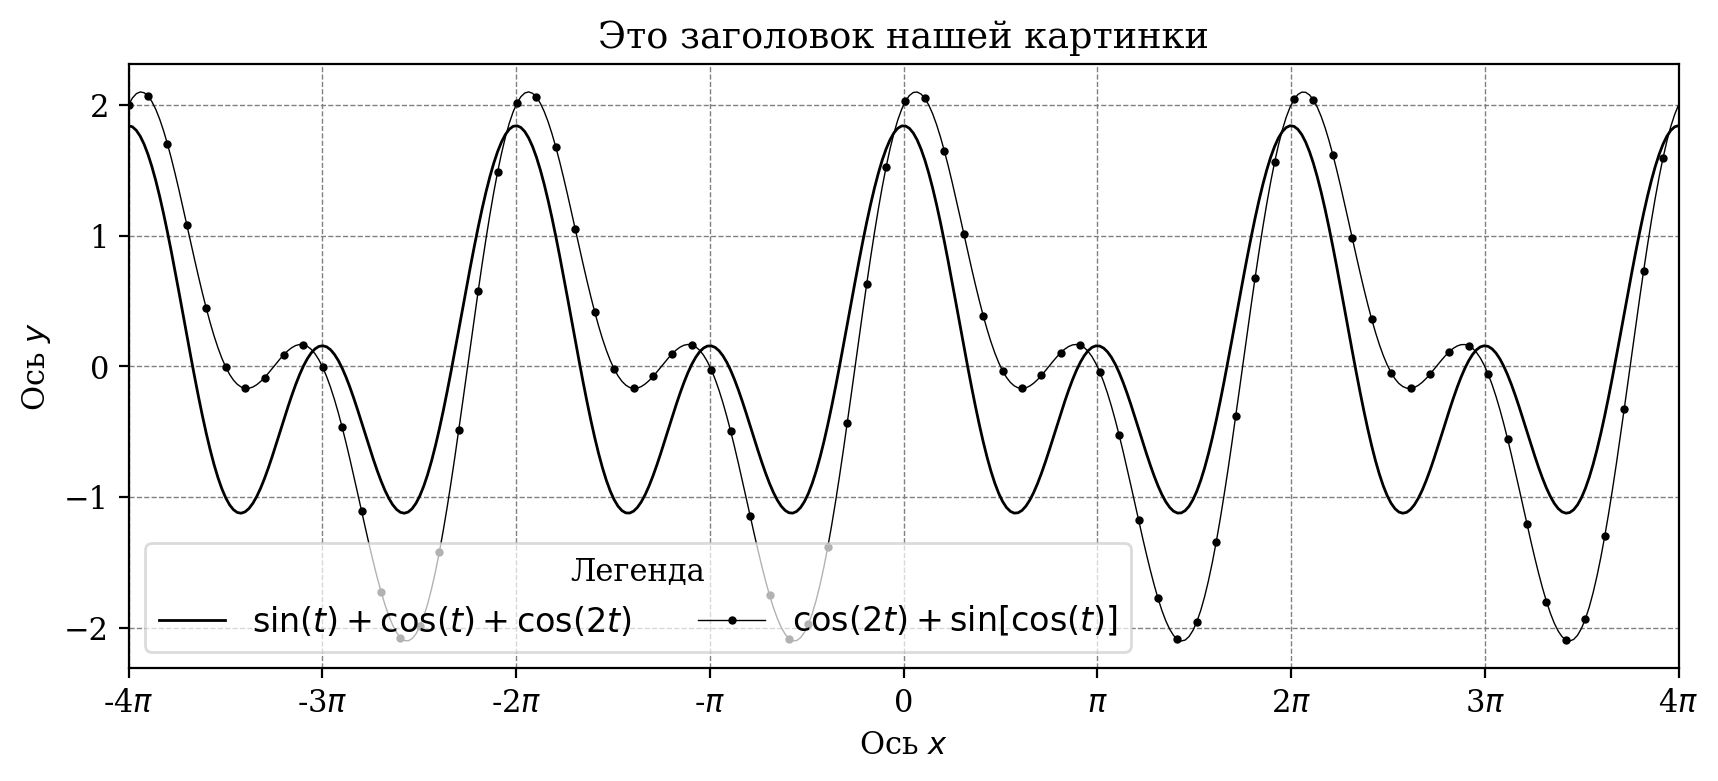

In [14]:
xticks = np.linspace(-4*np.pi, 4*np.pi, 9)
xtickslabels = []

for xtick in xticks:
    i = int(xtick/np.pi)
    if i == 1:
        xtickslabels.append(r'$\pi$')
    elif i == -1:
        xtickslabels.append(r'-$\pi$')
    elif i == 0:
        xtickslabels.append(r'0')
    else:
        xtickslabels.append(r'{0}$\pi$'.format(i))

ax04.set_xticks(xticks)
ax04.set_xticklabels(xtickslabels)

fig04.savefig('img04b.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)

fig04

Часто бывает необходимо построить два графика в отдельных системах координат, но при этом близко друг к другу с общими отсечками по одной из осей. Рассмотрим следующий пример.

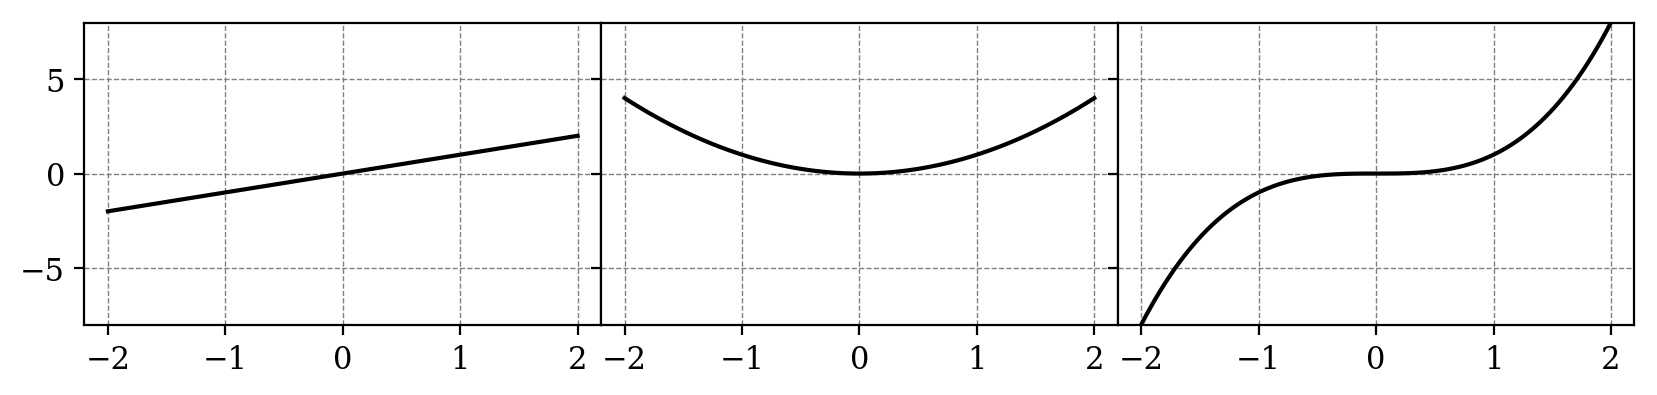

In [15]:
fig05 = plt.figure(num=4, figsize=(10, 2))

axs05 = [fig05.add_subplot(1, 3, i) for i in range(1,4)]

x = np.linspace(-2,2,100)
funcs = [x, x**2, x**3]

y_min = np.min(funcs)
y_max = np.max(funcs)

for (f, ax) in zip(funcs, axs05):
    ax.plot(x, f)
    ax.set_ylim(bottom=y_min, top=y_max)

for ax in axs05[1:]:
    ax.set_yticklabels([])
    
fig05.subplots_adjust(wspace=0)

fig05.savefig('img05.pdf', format='pdf', bbox_inches='tight', pad_inches=0.0)